# Imported Libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pt
import sweetviz
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import scipy.stats as st
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv(r"C:\Users\bhava\Downloads\fedex.csv")
df

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604170,2008,6,19,4,1059.0,1100,1256,DL,1547,236.0,-1.0,ATL,JAC,1572,0.0
3604171,2008,6,19,4,555.0,600,738,DL,1548,98.0,-5.0,RSW,ATL,515,0.0
3604172,2008,6,19,4,821.0,827,1003,DL,1548,96.0,-6.0,ATL,IND,432,0.0
3604173,2008,6,19,4,718.0,735,852,DL,1551,77.0,-17.0,CAE,ATL,191,0.0


# Exploratory Data Analysis

## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [4]:
viz = sweetviz.analyze(df)

                                             |                                             | [  0%]   00:00 ->…

In [5]:
viz.show_html('report.html')

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [6]:
df.nunique().sort_values(ascending =False)

Carrier_Num              7340
Actual_Shipment_Time     1439
Distance                 1423
Planned_Delivery_Time    1353
Planned_Shipment_Time    1188
Shipment_Delay            997
Planned_TimeofTravel      499
Destination               299
Source                    297
DayofMonth                 31
Carrier_Name               20
DayOfWeek                   7
Month                       6
Delivery_Status             2
Year                        1
dtype: int64

## Dropping Duplicates 

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
# Detecting and Dropping nan values for 'Delivery_Status' column
df["Delivery_Status"].unique()

array([ 0.,  1., nan])

In [9]:
df.loc[pd.isna(df["Delivery_Status"]), ["Delivery_Status"]]

,Delivery_Status
178,NaN
373,NaN
399,NaN
401,NaN
415,NaN
...,...
3603242,NaN
3603243,NaN
3603246,NaN
3603849,NaN


In [10]:
df = df.dropna(subset=["Delivery_Status"])

In [11]:
# Typcasting  float to int type
df["Delivery_Status"]=df["Delivery_Status"].astype("int")

In [12]:
a=df["Destination"].value_counts(ascending =False)
b=a.head(20)

c=list(b.index)
c

['ATL',
 'ORD',
 'DFW',
 'DEN',
 'LAX',
 'PHX',
 'IAH',
 'LAS',
 'DTW',
 'SLC',
 'EWR',
 'SFO',
 'MCO',
 'MSP',
 'CLT',
 'BOS',
 'JFK',
 'LGA',
 'SEA',
 'BWI']

In [13]:
aa=df["Source"].value_counts(ascending =False)
bb=aa.head(20)

cc=list(bb.index)
cc

['ATL',
 'ORD',
 'DFW',
 'DEN',
 'LAX',
 'PHX',
 'IAH',
 'LAS',
 'DTW',
 'SLC',
 'EWR',
 'SFO',
 'MCO',
 'MSP',
 'CLT',
 'BOS',
 'JFK',
 'LGA',
 'SEA',
 'BWI']

In [14]:
def convert_to_minutes(time):
    hours = time//100
    minutes = time%100
    return hours * 60 + minutes

In [15]:
df['Actual_Shipment_Time'] = df['Actual_Shipment_Time'].apply(convert_to_minutes)

In [16]:
df['Planned_Delivery_Time'] = df['Planned_Delivery_Time'].apply(convert_to_minutes)

In [17]:
df['Planned_Shipment_Time'] = df['Planned_Shipment_Time'].apply(convert_to_minutes)

In [18]:
# Nan values identification 
df.isna().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
Actual_Shipment_Time       0
Planned_Shipment_Time      0
Planned_Delivery_Time      0
Carrier_Name               0
Carrier_Num                0
Planned_TimeofTravel     406
Shipment_Delay             0
Source                     0
Destination                0
Distance                   0
Delivery_Status            0
dtype: int64

## created a balanced dataset with equal representation of both classes

In [19]:
import pandas as pd
from sklearn.utils import resample

# Assuming your data is in a DataFrame called 'df' and the target variable is 'target'
# Separate the majority and minority classes
df_majority = df[df.Delivery_Status == 0]
df_minority = df[df.Delivery_Status == 1]

# Downsample the majority class to the same size as the minority class
df_majority_downsampled = df_majority.sample(n=50000, random_state=42)
df_minority_downsampled = df_minority.sample(n=50000, random_state=42)

# Combine the downsampled majority class with the minority class
df_balanced = pd.concat([df_majority_downsampled, df_minority_downsampled])

# Shuffle the balanced dataset (optional)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(f"Balanced class distribution:\n{df_balanced['Delivery_Status'].value_counts()}")



Balanced class distribution:
Delivery_Status
1    50000
0    50000
Name: count, dtype: int64


In [20]:
df_balanced

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,4,5,1181.0,1160,1386,CO,1802,346.0,21.0,EWR,TUS,2116,1
1,2008,3,16,7,924.0,900,960,WN,24,60.0,24.0,PHX,LAS,256,1
2,2008,2,26,2,1187.0,1172,1189,NW,383,77.0,15.0,DTW,MSN,312,0
3,2008,2,1,5,748.0,675,795,XE,2202,120.0,73.0,CLT,EWR,529,1
4,2008,3,15,6,471.0,360,417,9E,2007,57.0,111.0,GSP,ATL,153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2008,6,8,7,535.0,520,710,AA,1165,190.0,15.0,JFK,MIA,1090,0
99996,2008,1,18,5,1114.0,1035,1120,WN,3228,85.0,79.0,SNA,SMF,404,1
99997,2008,4,1,2,1165.0,1140,1245,9E,5798,105.0,25.0,MEM,MSN,559,1
99998,2008,2,4,1,504.0,500,593,DL,749,273.0,4.0,ATL,LAS,1747,0


### Data Exploration with Balanced dataset

In [21]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   100000 non-null  int64  
 1   Month                  100000 non-null  int64  
 2   DayofMonth             100000 non-null  int64  
 3   DayOfWeek              100000 non-null  int64  
 4   Actual_Shipment_Time   100000 non-null  float64
 5   Planned_Shipment_Time  100000 non-null  int64  
 6   Planned_Delivery_Time  100000 non-null  int64  
 7   Carrier_Name           100000 non-null  object 
 8   Carrier_Num            100000 non-null  int64  
 9   Planned_TimeofTravel   99985 non-null   float64
 10  Shipment_Delay         100000 non-null  float64
 11  Source                 100000 non-null  object 
 12  Destination            100000 non-null  object 
 13  Distance               100000 non-null  int64  
 14  Delivery_Status        100000 non-nul

In [22]:
df_balanced.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'Actual_Shipment_Time',
       'Planned_Shipment_Time', 'Planned_Delivery_Time', 'Carrier_Name',
       'Carrier_Num', 'Planned_TimeofTravel', 'Shipment_Delay', 'Source',
       'Destination', 'Distance', 'Delivery_Status'],
      dtype='object')

In [23]:
df_balanced.describe()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance,Delivery_Status
count,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99985.000000,100000.000000,100000.000000,100000.000000
mean,2008.0,3.509780,15.584190,3.958650,867.873460,847.468390,946.485060,2228.423170,130.752673,29.160270,739.035420,0.500000
std,0.0,1.724301,8.814239,1.980439,289.587756,274.511551,292.116458,1949.505274,69.394909,51.316361,558.639054,0.500003
min,2008.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-61.000000,31.000000,0.000000
25%,2008.0,2.000000,8.000000,2.000000,636.000000,620.000000,727.000000,619.000000,80.000000,-2.000000,333.000000,0.000000
50%,2008.0,3.000000,16.000000,4.000000,885.000000,860.000000,975.000000,1571.000000,114.000000,15.500000,594.000000,0.500000
75%,2008.0,5.000000,23.000000,6.000000,1107.000000,1075.000000,1187.000000,3603.000000,160.000000,40.000000,972.000000,1.000000
max,2008.0,6.000000,31.000000,7.000000,1440.000000,1439.000000,1440.000000,7829.000000,660.000000,1358.000000,4962.000000,1.000000


In [24]:
df_balanced.isna().sum()     # Nan values identification

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
Actual_Shipment_Time      0
Planned_Shipment_Time     0
Planned_Delivery_Time     0
Carrier_Name              0
Carrier_Num               0
Planned_TimeofTravel     15
Shipment_Delay            0
Source                    0
Destination               0
Distance                  0
Delivery_Status           0
dtype: int64

In [25]:
df_balanced.dropna(inplace=True)  # dropping the nan values

In [26]:
df_balanced.reset_index(inplace=True)

In [27]:
df_balanced.drop("index",axis=1,inplace=True)

In [28]:
df_balanced

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,4,5,1181.0,1160,1386,CO,1802,346.0,21.0,EWR,TUS,2116,1
1,2008,3,16,7,924.0,900,960,WN,24,60.0,24.0,PHX,LAS,256,1
2,2008,2,26,2,1187.0,1172,1189,NW,383,77.0,15.0,DTW,MSN,312,0
3,2008,2,1,5,748.0,675,795,XE,2202,120.0,73.0,CLT,EWR,529,1
4,2008,3,15,6,471.0,360,417,9E,2007,57.0,111.0,GSP,ATL,153,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99980,2008,6,8,7,535.0,520,710,AA,1165,190.0,15.0,JFK,MIA,1090,0
99981,2008,1,18,5,1114.0,1035,1120,WN,3228,85.0,79.0,SNA,SMF,404,1
99982,2008,4,1,2,1165.0,1140,1245,9E,5798,105.0,25.0,MEM,MSN,559,1
99983,2008,2,4,1,504.0,500,593,DL,749,273.0,4.0,ATL,LAS,1747,0


In [29]:
df_balanced.drop_duplicates(inplace=True) # dropping duplicate values

In [30]:
df_balanced.isna().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
Actual_Shipment_Time     0
Planned_Shipment_Time    0
Planned_Delivery_Time    0
Carrier_Name             0
Carrier_Num              0
Planned_TimeofTravel     0
Shipment_Delay           0
Source                   0
Destination              0
Distance                 0
Delivery_Status          0
dtype: int64

## Data Visualization

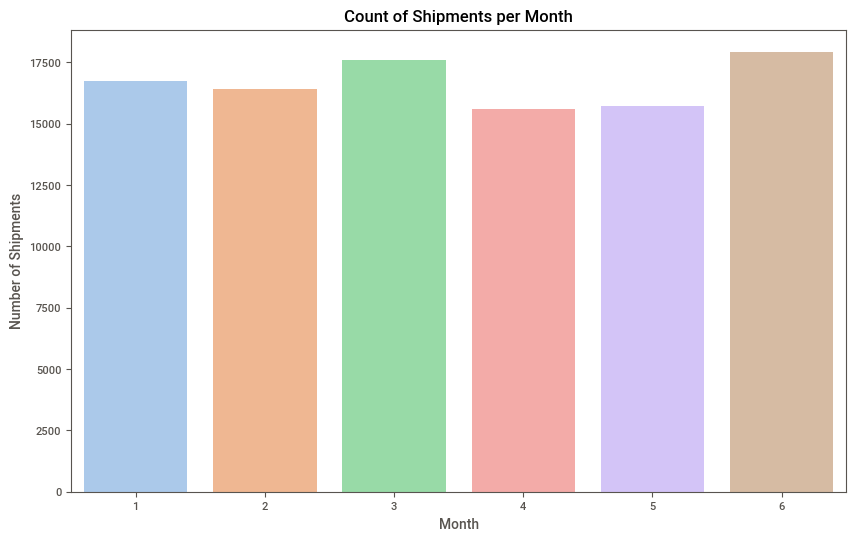

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_balanced, x='Month', palette='pastel')
plt.title('Count of Shipments per Month')
plt.xlabel('Month')
plt.ylabel('Number of Shipments')
plt.show()


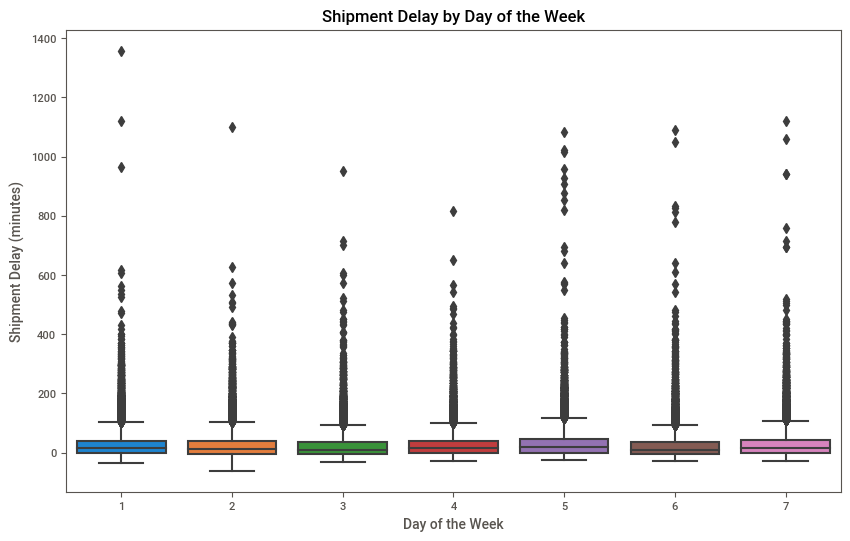

In [65]:
# 2. Shipment Delay by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Shipment_Delay', data=df_balanced)
plt.title('Shipment Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Shipment Delay (minutes)')
plt.show()

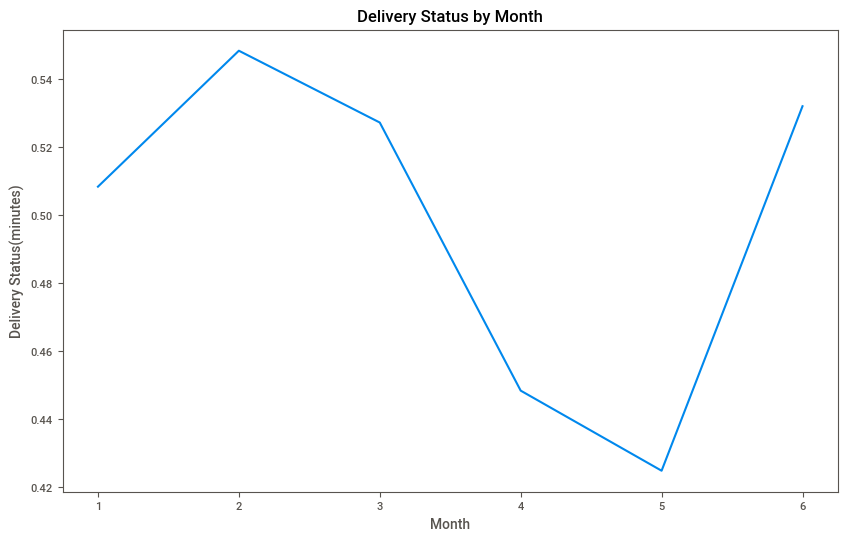

In [66]:
 #1. Average Shipment Delay by Month
plt.figure(figsize=(10, 6))
monthly_avg_delay = df_balanced.groupby('Month')['Delivery_Status'].mean()
sns.lineplot(x=monthly_avg_delay.index, y=monthly_avg_delay.values)
plt.title('Delivery Status by Month')
plt.xlabel('Month')
plt.ylabel('Delivery Status(minutes)')
plt.show()


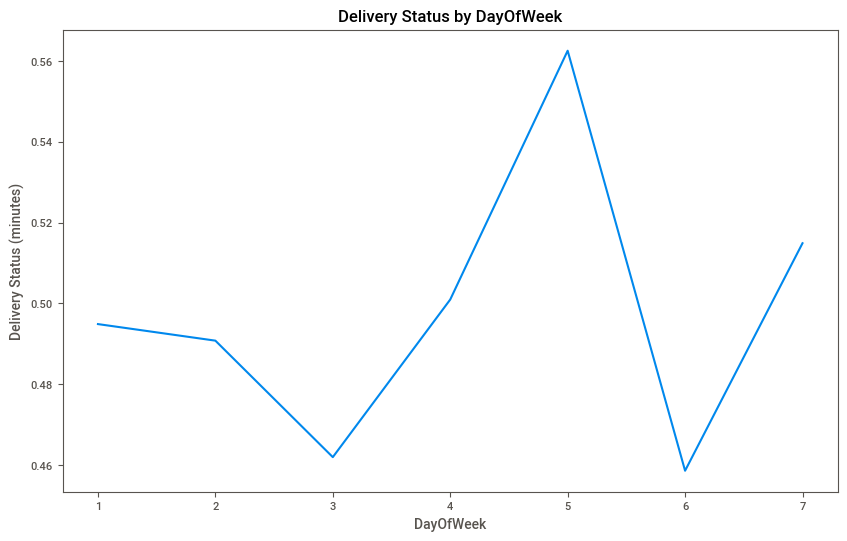

In [67]:
 #1. Average Shipment Delay by week
plt.figure(figsize=(10, 6))
weekly_avg_delay = df_balanced.groupby('DayOfWeek')['Delivery_Status'].mean()
sns.lineplot(x=weekly_avg_delay.index, y=weekly_avg_delay.values)
plt.title('Delivery Status by DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Delivery Status (minutes)')
plt.show()


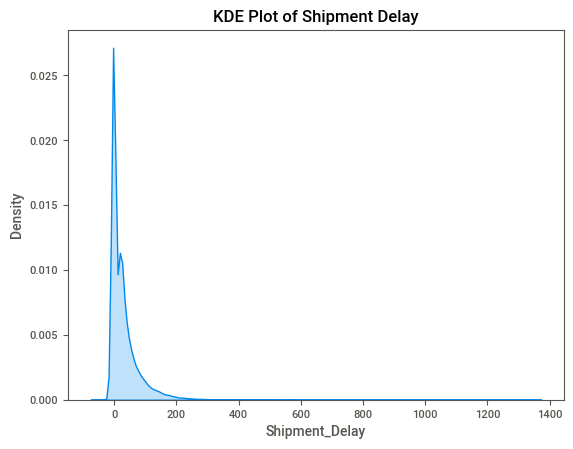

In [68]:
sns.kdeplot(df_balanced['Shipment_Delay'], shade=True)
plt.title('KDE Plot of Shipment Delay')
plt.show()

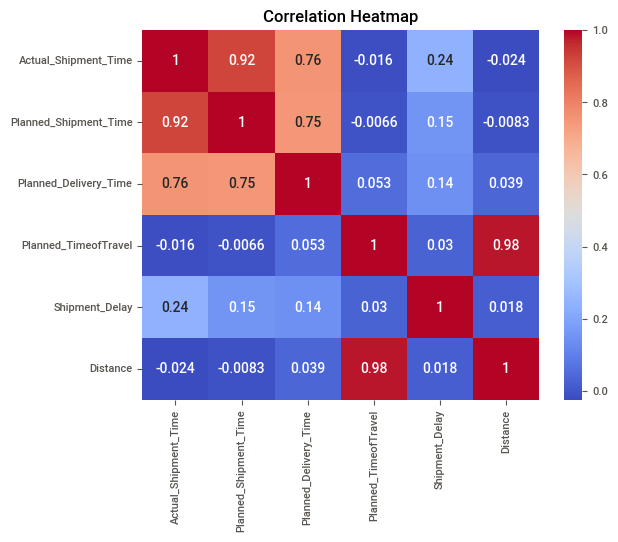

In [69]:
correlation_matrix = df_balanced[['Actual_Shipment_Time', 'Planned_Shipment_Time', 'Planned_Delivery_Time',
                           'Planned_TimeofTravel', 'Shipment_Delay', 'Distance']].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

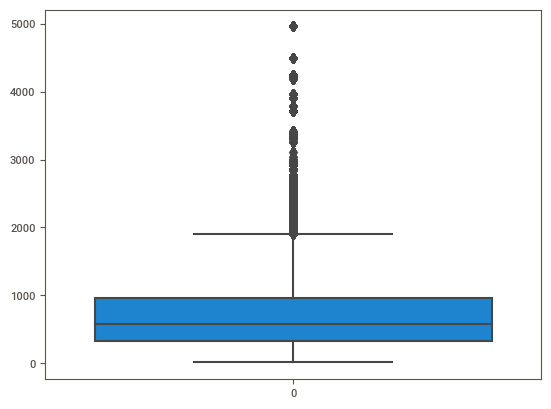

In [70]:
# Outlier detection before using Winsorizer method 
sns.boxplot(df['Distance'])

In [71]:
def outlier_(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [72]:
sum(outlier_(df_balanced['Distance']))

5016

In [73]:
from feature_engine.outliers import Winsorizer

winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Distance'])
df_balanced['Distance']=winsor.fit_transform(df_balanced[['Distance']])
sum(outlier_(df_balanced['Distance']))

0

<Axes: >

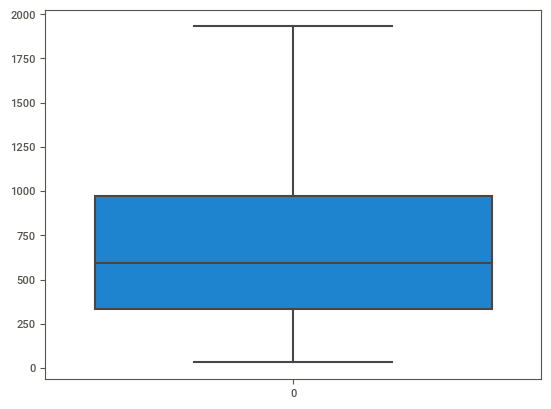

In [74]:
# no outliers after using Winsorizer method 
sns.boxplot(df_balanced['Distance'])

## Performed One Hot Encoding for catrogical columns

In [75]:
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df_balanced[['Carrier_Name']])

# Convert the output to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Display the result
encoded_df

,Carrier_Name_9E,Carrier_Name_AA,Carrier_Name_AQ,Carrier_Name_AS,Carrier_Name_B6,Carrier_Name_CO,Carrier_Name_DL,Carrier_Name_EV,Carrier_Name_F9,Carrier_Name_FL,Carrier_Name_HA,Carrier_Name_MQ,Carrier_Name_NW,Carrier_Name_OH,Carrier_Name_OO,Carrier_Name_UA,Carrier_Name_US,Carrier_Name_WN,Carrier_Name_XE,Carrier_Name_YV
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99980,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99982,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99983,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df_balanced[['Source']])

# Convert the output to a DataFrame
encoded_df1 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Display the result
encoded_df1

,Source_ABE,Source_ABI,Source_ABQ,Source_ABY,Source_ACK,Source_ACT,Source_ACV,Source_ACY,Source_ADK,Source_ADQ,...,Source_TYR,Source_TYS,Source_VLD,Source_VPS,Source_WRG,Source_WYS,Source_XNA,Source_YAK,Source_YKM,Source_YUM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df_balanced[['Destination']])

# Convert the output to a DataFrame
encoded_df2 = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

# Display the result
encoded_df2

,Destination_ABE,Destination_ABI,Destination_ABQ,Destination_ABY,Destination_ACT,Destination_ACV,Destination_ACY,Destination_ADK,Destination_ADQ,Destination_AEX,...,Destination_TXK,Destination_TYR,Destination_TYS,Destination_VLD,Destination_VPS,Destination_WRG,Destination_XNA,Destination_YAK,Destination_YKM,Destination_YUM
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Concating the OHE columns with balanced dataset after removing the original columns 

In [78]:
df_balanced = df_balanced.drop(columns=["Carrier_Name","Source","Destination"])

df_bal = pd.concat([df_balanced,encoded_df],axis=1)
df_bal = pd.concat([df_bal,encoded_df1],axis=1)
df_bal = pd.concat([df_bal,encoded_df2],axis=1)

In [79]:
df_bal

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,...,Destination_TXK,Destination_TYR,Destination_TYS,Destination_VLD,Destination_VPS,Destination_WRG,Destination_XNA,Destination_YAK,Destination_YKM,Destination_YUM
0,2008,1,4,5,1181.0,1160,1386,1802,346.0,21.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008,3,16,7,924.0,900,960,24,60.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008,2,26,2,1187.0,1172,1189,383,77.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008,2,1,5,748.0,675,795,2202,120.0,73.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008,3,15,6,471.0,360,417,2007,57.0,111.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99980,2008,6,8,7,535.0,520,710,1165,190.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99981,2008,1,18,5,1114.0,1035,1120,3228,85.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99982,2008,4,1,2,1165.0,1140,1245,5798,105.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99983,2008,2,4,1,504.0,500,593,749,273.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
df_bal.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Actual_Shipment_Time    0
                       ..
Destination_WRG         0
Destination_XNA         0
Destination_YAK         0
Destination_YKM         0
Destination_YUM         0
Length: 619, dtype: int64

## Declaring feature variables

In [81]:
X= df_balanced.drop(['Delivery_Status'],axis=1)
X

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Distance
0,2008,1,4,5,1181.0,1160,1386,1802,346.0,21.0,1930.5
1,2008,3,16,7,924.0,900,960,24,60.0,24.0,256.0
2,2008,2,26,2,1187.0,1172,1189,383,77.0,15.0,312.0
3,2008,2,1,5,748.0,675,795,2202,120.0,73.0,529.0
4,2008,3,15,6,471.0,360,417,2007,57.0,111.0,153.0
...,...,...,...,...,...,...,...,...,...,...,...
99980,2008,6,8,7,535.0,520,710,1165,190.0,15.0,1090.0
99981,2008,1,18,5,1114.0,1035,1120,3228,85.0,79.0,404.0
99982,2008,4,1,2,1165.0,1140,1245,5798,105.0,25.0,559.0
99983,2008,2,4,1,504.0,500,593,749,273.0,4.0,1747.0


## Declaring the target variable

In [82]:
y=df_balanced[["Delivery_Status"]]
y

,Delivery_Status
0,1
1,1
2,0
3,1
4,1
...,...
99980,0
99981,1
99982,1
99983,0


## Spliting data into separate training and test set

In [83]:
X= df_balanced.drop(['Delivery_Status'],axis=1)
y=df_balanced[["Delivery_Status"]]

## Performing Feature Selection

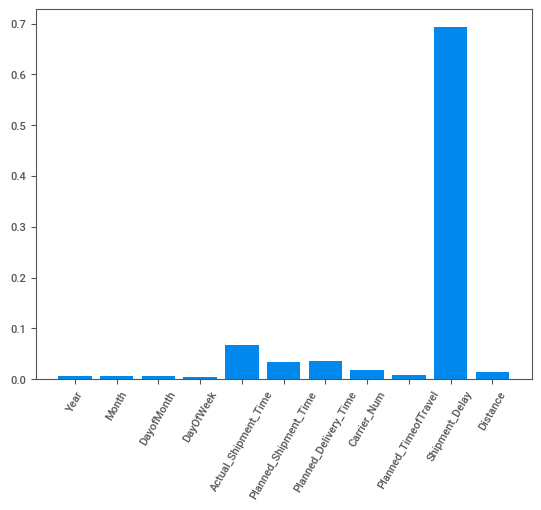

In [84]:
from sklearn.feature_selection  import mutual_info_classif
weights=mutual_info_classif(X,y)
columns=X.columns
plt.bar(x=columns,height=weights)
plt.xticks(rotation=60)
plt.show()

## LogisticRegression 

### Model Evaluation and  Predicting results 

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10022
           1       1.00      1.00      1.00      9975

    accuracy                           1.00     19997
   macro avg       1.00      1.00      1.00     19997
weighted avg       1.00      1.00      1.00     19997



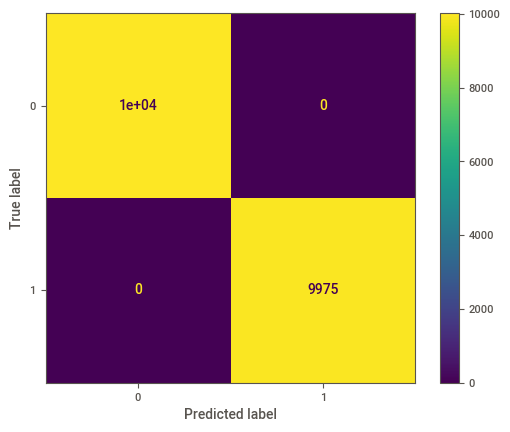

In [87]:
np.seterr(under='ignore')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

lr=LogisticRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
plt=ConfusionMatrixDisplay(cm)
plt.plot()


### ROC-AUC CURVE 

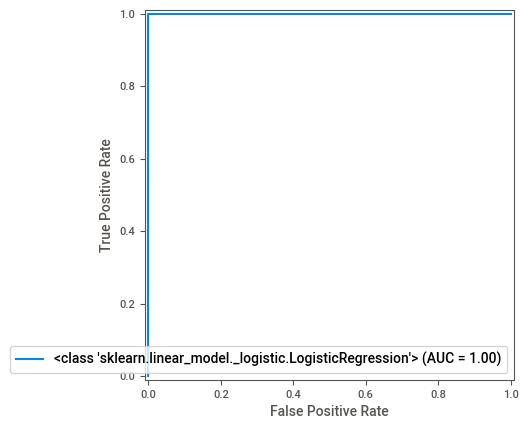

In [88]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

lr.fit(X_train,y_train)

y_prob=lr.predict_proba(X_test)[:,1]

fpr,tpr,thr= roc_curve(y_test,y_prob)

area = auc(fpr,tpr)
curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area, estimator_name=LogisticRegression)
curve.plot()

In [89]:
## plotted learning curve to visualize the training and testing performance of a model as a function of the training set size.

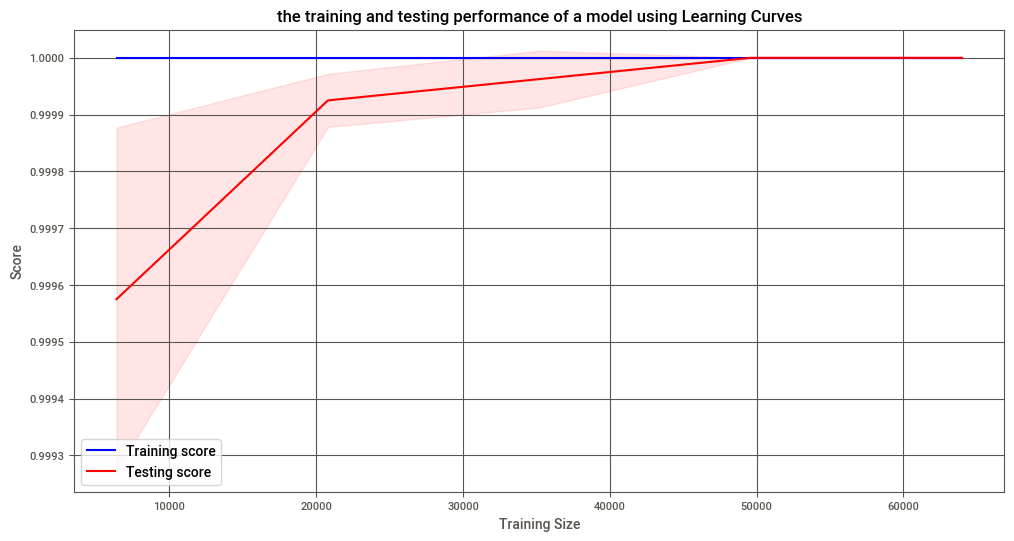

In [90]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, cv=5, n_jobs=-1)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.1)
plt.plot(train_sizes, test_scores_mean, label='Testing score', color='red')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='red', alpha=0.1)

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('the training and testing performance of a model using Learning Curves')
plt.legend(loc='best')
plt.grid()
plt.show()


Learning Curve:
- This code computes the learning curve for lr(Logistic Regression) using the training data x_train and y_train.

- It then plots the training scores and testing scores against different training sizes to help understand how the model's performance changes as it is trained on more data.

- The plot provides insights into whether the model is underfitting, overfitting, or if it's a good fit.

- underfitting : If both the training score and the cross-validation score are low and close to each other, the model is likely underfitting. 

- overfitting : If the training score is high but the cross-validation score is much lower, the model is likely overfitting. 


- Conclusion :
     - The testing score curve is significantly near to the training score curve, it suggest that the model is good fitted to the training data.

     - The testing score curve improves as the training size increases.

In [91]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,1203.0,1195,1345,WN,335,150.0,8.0,IAD,TPA,810,0
1,2008,1,3,4,474.0,455,600,WN,3231,145.0,19.0,IAD,TPA,810,1
2,2008,1,3,4,388.0,380,470,WN,448,90.0,8.0,IND,BWI,515,0
3,2008,1,3,4,566.0,570,660,WN,1746,90.0,-4.0,IND,BWI,515,0
4,2008,1,3,4,1109.0,1075,1165,WN,3920,90.0,34.0,IND,BWI,515,1


# Pickiling the model for Deployment

In [92]:
import pickle

In [93]:
pickle.dump(lr,open("fedex.pkl","wb"))

In [94]:
pickle.load(open("fedex.pkl","rb"))

LogisticRegression()